# Leetcode刷题(20181022)

## [82-Remove Duplicates from Sorted List II](https://leetcode.com/problems/remove-duplicates-from-sorted-list-ii/description/)

问题难度: &clubs;&clubs;&clubs;

### 问题描述

给定一个排好序的链式列表, 删除所有有重复节点的数字, 只留下原始链表中的*唯一*字符.

**示例1**
```
Input: 1->2->3->3->4->4->5
Output: 1->2->5
```

**示例2**
```
Input: 1->1->1->2->3
Output: 2->3
```

### 解题思路

本质思想与之前删除数组中重复的数字类似, 只不过把存储格式从数组换成了链表. 在这里,我们使用了三个指针, 分别标识:
- 新链表当前元素, 用于移动元素, 如果某个数字不重复,则将该结点加入到新链表中,并将链表前移动;如果重复的话,暂时将链表的`next`指向下一个结点
- 原链表前元素, 判断元素是否重复,至少需要比较两个结点, 便于在数字不重复的情况下将其加入新链表
- 原链表后后元素, 用于判断元素是否与之前的节点数值相同

### 代码

In [1]:
# Definition for singly-linked list.
class ListNode(object):
    def __init__(self, x):
        self.val = x
        self.next = None


class Solution(object):
    def deleteDuplicates(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """
        if head is None or head.next is None:
            return head
        ans = ListNode(0)
        tmp = ListNode(0)
        now, end = head, head.next
        now_num = now.val
        ans.next = tmp
        is_dup = False
        while end is not None:
            while end is not None and end.val == now_num:
                is_dup = True
                end = end.next
            if not is_dup:
                tmp.next = now
                tmp = tmp.next
            else:
                tmp.next = end
            if end is not None:
                now = end
                now_num = now.val
                is_dup = False
                end = end.next
        return ans.next.next

In [3]:
a = ListNode(1)
b = ListNode(2)
c = ListNode(3)
d = ListNode(3)
e = ListNode(3)
f = ListNode(4)

a.next = b
b.next = c
c.next = d
d.next = e
e.next = f

s = Solution()
res = s.deleteDuplicates(a)
while res is not None:
    print(res.val)
    res = res.next

1
2
4


## [84-Largest Rectangle in Histogram](https://leetcode.com/problems/largest-rectangle-in-histogram/description/)

问题难度:&clubs;&clubs;&clubs;&clubs;&clubs;

### 问题描述

给定`n`个非负的整数表示直方图的块权重, 其中每一块的宽度均为`1`, 找到直方图中最大长方形的面积.

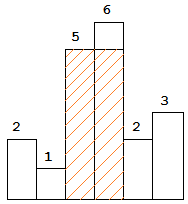
上面是一个直方图, 每一块的宽度均为`1`, 给定的高度为`[2,1,5,6,2,3]`

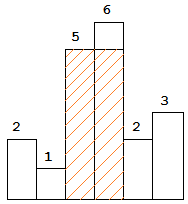
最大的长方形展示为阴影处, 其面积为`10`个单位

**示例**
```
Input: [2,1,5,6,2,3]
Output: 10
```

### 解题思路

**方法1**

从头开始遍历数组, 分别遍历两遍, `i`从`0`到`len(heights)`, `j`从`i`到`len(heights)`, `i`到`j`的长方形计算公式如下: `min(nums[i:j])*(j-i+1)`. 这样, 自然而然可以得到一个`o(n^2)`复杂度的算法. 但是, 很明显,这样肯定会超过时间复杂度, 无法`AC`.

**方法2**

网上看到一种借助栈的算法, 思路如下:
- 如果已知`heights`是升序, 例如`[1,2,3,4,5]`, 那么需要比较`1*5 Vs 2*4 Vs 3*3 Vs 4*2 Vs 5*1`, 归纳一下为: `heights[i] * (len(heights) - i)`
- 但是`heights`本身不一定是升序的, 因此需要考虑构造这样的升序序列(假设用栈存储). 以`[2,1,5,6,2,3]`为例, 具体的构造过程如下:
    - `2`进栈, `s={2}`, 此时`ans = 2`
    - `1`不满足升序, 将`2`弹出, 并记录当前结果`2*1=2`, 将`2`替换为`1`重新进栈, `s={1,1}`, `ans=2`
    - `5`满足升序, 直接进栈, `s={1,1,5}`, `ans=2`
    - `6`满足升序, 直接进栈, `s={1,1,5,6}`, `ans=2`
    - `2`不满足升序, 将`6`弹出, 并记录当前结果`6*1=6`,`s={1,1,5}`, `ans=6`, 仍然不满足升序条件, 将`5`弹出, 并记录当前结果`5*2=10`, `s={1,1}`, `ans=10`, 此时终于满足升序条件了, 将弹出的`5`,`6`全部替换为`2`重新进栈, `s={1,1,2,2,2}`, `ans=10`
    - `3`满足升序, 直接进栈, `s={1,1,2,2,2,3}`, `ans=10`
    构造完成, 只需要按照上一种条件遍历计算即可. 整体时间复杂度为`O(n)`.
    
### 代码

In [14]:
class Solution(object):
    # method 1: brute force
    def largestRectangleArea(self, heights):
        """
        :type heights: List[int]
        :rtype: int
        """
        max_area = 0
        if len(heights) == 0:
            return max_area
        for i in range(len(heights)):
            min_num = heights[i]
            for j in range(i, len(heights)):
                if heights[j] < min_num:
                    min_num = heights[j]
                area = (j-i + 1) * min_num
                if area > max_area:
                    max_area = area
        return max_area
    
    # method 2: stack method
    def largestRectangleAreaStack(self, heights):
        """
        :type heights: List[int]
        :rtype: int
        """
        if len(heights) == 0:
            return 0
        ans = 0
        s = [heights[0]]
        for i in range(1, len(heights)):
            num = heights[i]
            if num >= s[-1]:
                s.append(num)
            else:
                j = len(s) - 1
                tmp = list()
                while j >= 0:
                    if num >= s[j]:
                        break
                    now_ans = s[j] * (len(s) - j)
                    if now_ans > ans:
                        ans = now_ans
                    j -= 1
                j += 1
                while j < len(s):
                    s[j] = num
                    j += 1
                s.append(num)
        for i in range(len(s)):
            now_ans = s[i] * (len(s)-i)
            if now_ans > ans:
                ans = now_ans
        return ans

s = Solution()
heights = [4,2,0,3,2,5]
print (s.largestRectangleAreaStack(heights))

6


## [85-Maximal Rectangle](https://leetcode.com/problems/maximal-rectangle/description/)

问题难度:&clubs;&clubs;&clubs;&clubs;&clubs;

### 问题描述

给定一个使用`0`和`1`填充的二维二进制举证, 找到只包含`1`的最大矩阵, 并且返回这个矩阵的面积.

**示例**

```
Input:
[
  ["1","0","1","0","0"],
  ["1","0","1","1","1"],
  ["1","1","1","1","1"],
  ["1","0","0","1","0"]
]
Output: 6
```

In [ ]:
class Solution(object):
    def maximalRectangle(self, matrix):
        """
        :type matrix: List[List[str]]
        :rtype: int
        """
        